In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats

In [2]:
mereni = x,y = np.loadtxt('sada_422944_50ks-bez0.txt', unpack = True) #unpack-ulozeni v x, y; rucni odstr. nulovych hodnot

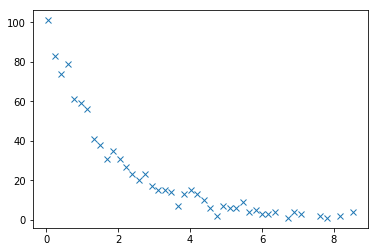

In [3]:
plt.plot(x, y, 'x') #obyc. vykresleni dat

In [4]:
lny = np.log(y) #hlaska = pro funkci vyhodit nuly (log v nule nedefinovan) - vyhozeno rucne

In [5]:
#pole = [] #neni potreba, vyreseno rucne
#for x in mereni: 
    #if x[1] !=0:
        #pole.append(x)
#pole=np.array(pole)
#x,y=data=np.transpose(pole) 

In [6]:
mat_M = np.array([np.ones(len(x)), (-x)]).T #model. matice - jak by to melo vypadat / opraveno na zlog. / vyhneme se exp.
mat_M

array([[ 1.  , -0.06],
       [ 1.  , -0.24],
       [ 1.  , -0.42],
       [ 1.  , -0.6 ],
       [ 1.  , -0.78],
       [ 1.  , -0.96],
       [ 1.  , -1.14],
       [ 1.  , -1.32],
       [ 1.  , -1.5 ],
       [ 1.  , -1.68],
       [ 1.  , -1.86],
       [ 1.  , -2.04],
       [ 1.  , -2.22],
       [ 1.  , -2.4 ],
       [ 1.  , -2.58],
       [ 1.  , -2.76],
       [ 1.  , -2.94],
       [ 1.  , -3.12],
       [ 1.  , -3.3 ],
       [ 1.  , -3.48],
       [ 1.  , -3.66],
       [ 1.  , -3.84],
       [ 1.  , -4.02],
       [ 1.  , -4.2 ],
       [ 1.  , -4.38],
       [ 1.  , -4.56],
       [ 1.  , -4.74],
       [ 1.  , -4.92],
       [ 1.  , -5.1 ],
       [ 1.  , -5.28],
       [ 1.  , -5.46],
       [ 1.  , -5.64],
       [ 1.  , -5.82],
       [ 1.  , -6.  ],
       [ 1.  , -6.18],
       [ 1.  , -6.36],
       [ 1.  , -6.72],
       [ 1.  , -6.9 ],
       [ 1.  , -7.08],
       [ 1.  , -7.62],
       [ 1.  , -7.8 ],
       [ 1.  , -8.16],
       [ 1.  , -8.52]])

In [7]:
#hessian = mat_M.T.dot(mat_M) - nelze pouzit, zmena konst. nejistot kvuli log(y)
mat_W = np.eye(43)*1/(y) #vahova matice jako inverze kovarianci merenych hodnot 
hessian = mat_M.T.dot(mat_W.dot(mat_M))

In [8]:
hessian

array([[   7.59803146,  -46.46190826],
       [ -46.46190826,  306.83203377]])

In [9]:
covar = np.linalg.inv(hessian) #kovariancni matice
covar

array([[ 1.77759745,  0.26917193],
       [ 0.26917193,  0.04401835]])

In [10]:
pars1 = covar.dot(mat_M.T.dot(lny))
pars1

array([ 108.23649621,   15.43421123])

In [11]:
A = np.exp(pars1[0])
l = pars1[1]
A, l #spocitane hodnoty parametru

(1.0151098544523547e+47, 15.4342112297225)

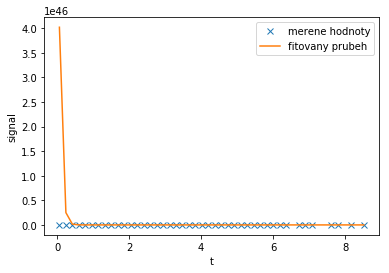

In [12]:
plt.plot(x, y, 'x', label='merene hodnoty')
plt.plot(x, A*np.exp(-x*l), label='fitovany prubeh')
plt.xlabel('t')
plt.ylabel('signal')
plt.legend(loc=0)

In [13]:
#suma rezidui
s0 = sum((lny-(pars1[0]-x*pars1[1]))**2)
rs0 = s0/(len(x)-2) #2 urcovane parametry

In [14]:
errs = np.sqrt(covar.diagonal())
corel = covar/errs.reshape(1,2)/errs.reshape(2,1)
print("korelacni matice parametru")
corel

korelacni matice parametru


array([[ 1.        ,  0.96226824],
       [ 0.96226824,  1.        ]])

In [15]:
errs*=np.sqrt(rs0)
print("nejistoty parametru:"+str(errs))

nejistoty parametru:[ 78.3797813   12.33400845]


In [16]:
#nekonstantni nejistoty, mnoo mame definovano vyse, ale pro uplnost znovu:
lny = np.log(y) #4
mat_M = np.array([np.ones(len(x)), (-x)]).T #6
mat_W = np.eye(43)*1/(y) #vahova matice jako inverze kovarianci merenych hodnot 
hessian = mat_M.T.dot(mat_W.dot(mat_M)) #7
covar = np.linalg.inv(hessian) #9
pars2 = covar.dot(mat_M.T.dot(mat_W.dot(lny)))
A2 = np.exp(pars2[0])
l2 = pars2[1]
print("parametry A, l")
A2, l2

parametry A, l


(50.151385216645288, 0.45645506461695051)

In [17]:
s2 = sum((lny-(pars2[0]-x*pars2[1]))**2)
rs2 = s2/(len(x)-2) #2 urcovane parametry
errs2 = np.sqrt(covar.diagonal())
corel2 = covar/errs2.reshape(1,2)/errs.reshape(2,1)
print("korelacni matice parametru")
corel2

korelacni matice parametru


array([[ 0.01701033,  0.0163685 ],
       [ 0.0163685 ,  0.01701033]])

In [18]:
errs*=np.sqrt(rs2)
print("nejistoty parametru:"+str(errs2))

nejistoty parametru:[ 1.33326571  0.20980552]


array([ 3.91504614,  0.45645506])

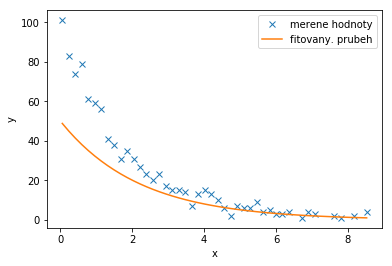

In [19]:
plt.plot(x, y, 'x', label="merene hodnoty")
plt.plot(x, A2*np.exp(-x*l2), label="fitovany. prubeh")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
pars2

In [20]:
def f(x, A, l):
    return (A)*np.exp(-x*l) 

In [21]:
popt, pcov = scipy.optimize.curve_fit(f, x, y)

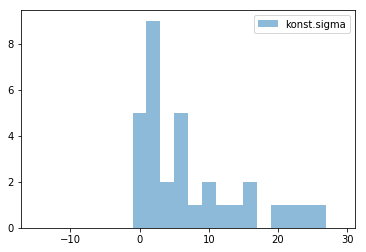

In [22]:
xbins=np.r_[-15:30:2]
ok1=plt.hist(popt[0]*np.exp(-x*popt[1])-lny,xbins,alpha=0.5,label="konst.sigma")
plt.legend(loc=0)

In [23]:
def moments(meas):
    cmeas = meas-meas.mean()
    return (cmeas**2).mean(), (cmeas**3).mean(),(cmeas**4).mean()
moms = moments(([np.ones(len(x)), (-x)])-lny)
skew, curt = moms[1]/moms[0]**1.5,moms[2]/moms[0]**2-3
skew, curt

(-0.029700170599881278, -1.1654626333771769)

In [24]:
er_skew = np.sqrt(6/len(x))
er_skew 

0.3735436838188142

In [25]:
er_curt = np.sqrt(24/len(x))
er_curt 

0.7470873676376284

In [26]:
two_sigma = (pars2[1])*2 
two_sigma

0.91291012923390102

In [27]:
if [er_curt - er_skew] < two_sigma:
    print ("odchylka neni stat. vyznamna")

odchylka neni stat. vyznamna
